# Ajuste de Curvas a Uma Lista de Pontos
## Método dos Mínimos Quadrados


In [1]:
import numpy as np

---
### Exemplo 1
Vamos ajustar uma curva de uma função quadrática da forma $y(x) = \alpha + \beta x + \gamma x^2$ aos pontos: $(1,0.5),(2,1.2),(2.8,2),(4,4),(5,7.8)$

No [GeoGebra](https://www.geogebra.org/m/vcbm2wa3) marcamos os pontos no plano, para termos uma ideia de como será a curva ajustadas aos mesmos.


In [2]:
# Usando Python para plotar os pontos listados

# Importando o pyplot: biblioteca python para plotagem de gráficos
from matplotlib import pyplot as plt

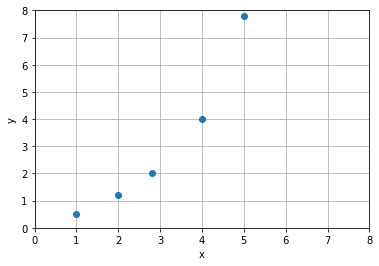

In [3]:
# Eixo x, Eixo y
plt.plot([1,2,2.8,4,5],[0.5,1.2,2,4,7.8],'o')
plt.axis([0, 8, 0, 8]) # [xmin, xmax, ymin, ymax]

plt.xlabel('x'), plt.ylabel('y') # Rótulos dos eixos x e y
plt.grid() # Exibindo a grade do plano

plt.show()

In [4]:
# Criando e exibindo as matrizes necessárias para os cálculos

A = np.array([[1,1,1**2], [1,2,2**2], [1,2.8,2.8**2], [1,4,4**2], [1,5,5**5]])
b = np.array([[0.5],[1.2],[2],[4],[7.8]])

A, b

(array([[1.000e+00, 1.000e+00, 1.000e+00],
        [1.000e+00, 2.000e+00, 4.000e+00],
        [1.000e+00, 2.800e+00, 7.840e+00],
        [1.000e+00, 4.000e+00, 1.600e+01],
        [1.000e+00, 5.000e+00, 3.125e+03]]),
 array([[0.5],
        [1.2],
        [2. ],
        [4. ],
        [7.8]]))

In [5]:
M = A.T # a variável M recebe a tranposta da matriz A
M = M.dot(A) # a variável M recebe o protudo MA

# usamos o método inv do pacote de algebra linear de numpy para inverter M
M = np.linalg.inv(M)

M # Exibindo M

array([[ 1.49619683e+00, -5.09812803e-01,  3.37444303e-04],
       [-5.09812803e-01,  2.08756505e-01, -1.71388611e-04],
       [ 3.37444303e-04, -1.71388611e-04,  2.69300257e-07]])

In [6]:
N = A.T # a variável N recebe a transposta de A
N = N.dot(b) # a variável N recebe o produto Nb

N # Exibindo N

array([[1.550000e+01],
       [6.350000e+01],
       [2.445998e+04]])

In [7]:
# Com as operações realizadas temos
# M = (A^tA)^(-1) e N = A^tb

# A viável x recebe o produto MN
x = M.dot(N)

# Exibindo o vetor x
x

array([[-9.28181239e-01],
       [ 1.16177762e+00],
       [ 9.34288818e-04]])

 Assim nossa função, com alguns arendodamentos, é da forma
 
 $$
 y=-0,928 + 1,162x + 0,001x^2
 $$

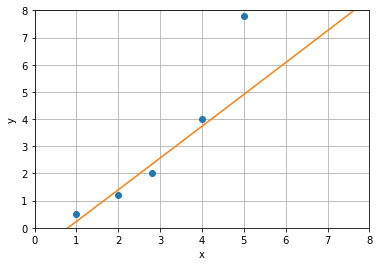

In [8]:
# Usando Python para plotar os pontos e a curva ajustada

# Plotando os pontos
plt.plot([1,2,2.8,4,5],[0.5,1.2,2,4,7.8],'o')

# Preparo para a plotagem da curva
x = np.linspace(0, 8, 1000) # 1000 pontos em [0, 8]
y = -0.928 + 1.162*x + 0.001*x**2 # Calculo dos valores y para cada x

# Plotando a curva
plt.plot(x,y)

# Configurações do Plano
plt.axis([0, 8, 0, 8])
plt.xlabel('x'), plt.ylabel('y')
plt.grid()

plt.show()

In [9]:
# Ajustando uma lista parábola aos pontos (1,1),(2,4),(3,9),(4,16),(5,25)

# Criando e exibindo as matrizes necessárias para os cálculos

A = np.array([[1,1,1**2], [1,2,2**2], [1,3,3**2], [1,4,4**2], [1,5,5**2]])
b = np.array([[1],[4],[9],[16],[25]])

A, b

(array([[ 1,  1,  1],
        [ 1,  2,  4],
        [ 1,  3,  9],
        [ 1,  4, 16],
        [ 1,  5, 25]]),
 array([[ 1],
        [ 4],
        [ 9],
        [16],
        [25]]))

In [10]:
M = A.T # a variável M recebe a tranposta da matriz A
M = M.dot(A) # a variável M recebe o protudo MA

# usamos o método inv do pacote de algebra linear de numpy para inverter M
M = np.linalg.inv(M)

M # Exibindo M

array([[ 4.6       , -3.3       ,  0.5       ],
       [-3.3       ,  2.67142857, -0.42857143],
       [ 0.5       , -0.42857143,  0.07142857]])

In [11]:
N = A.T # a variável N recebe a transposta de A
N = N.dot(b) # a variável N recebe o produto Nb

N # Exibindo N

array([[ 55],
       [225],
       [979]])

In [12]:
# Com as operações realizadas temos
# M = (A^tA)^(-1) e N = A^tb

# A viável x recebe o produto MN
x = M.dot(N)

# Exibindo o vetor x
x

array([[ 1.70530257e-13],
       [-5.68434189e-14],
       [ 1.00000000e+00]])

---
## Algoritmo para ajuste de uma função quadrática a uma lista de pontos

In [13]:
'''
Método para o ajuste da curva de uma Função Exponencial a uma lista de pontos
Mínimos Quadrados

Observações:
--> Os argumentos da função são duas listas de mesmo tamanho;
--> A primeira lista com as coordenadas x dos pontos que queremos ajustar;
--> E a segunda lista com as coordenadas y dos pontos.

A função retorna um vetor x = [a,b,c], onde y = a + bx + cx² é a função quadrática.
''' 

def parabola_minimos_quadrados(X,Y):
    import numpy as np
    from numpy.linalg import inv
    
    n = len(X)
    
    if len(X) != len(Y):
        return 'Dados de entrada incorretos.'
        
    else:
        A = np.zeros((n,3))
        v = np.zeros((n,1))
        
        for i in range(len(X)):
            v[i] = Y[i]
            A[i][0] = 1
            A[i][1] = X[i]
            A[i][2] = X[i]**2
        
        At = np.transpose(A)

        M = np.dot(At,A)
        N = np.dot(At,v)
        
        Mi = inv(M)
        x = np.dot(Mi,N)

        return x

In [14]:
# Ajustando uma parábola aos pontos (2,1),(-2,1.5),(7,4),(-6,5s)
x = [2,-2,7,-6]
y = [1,1.5,4,5]

c  = parabola_minimos_quadrados(x,y)
print(c), print(c.shape)

[[ 0.90846662]
 [-0.15987871]
 [ 0.08630121]]
(3, 1)


(None, None)

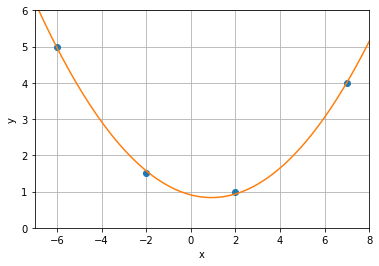

In [15]:
# Plotando os pontos
plt.plot(x,y,'o')

plt.axis([-7, 8, 0, 6])
plt.xlabel('x'), plt.ylabel('y')
plt.grid()


# Preparo para a plotagem da curva
X = np.linspace(-7, 8, 100) 
Y = c[0][0] + c[1][0]*X + c[2][0]*X**2 # Calculo dos valores y para cada x

# Plotando a curva
plt.plot(X,Y)

plt.show()